In [320]:
%load_ext autoreload
%autoreload 2
from common import *
from envs import *
from copy import deepcopy
from RiskAverseMCTS import RiskAverseMCTS
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
N_alpha = 5
N_params = 2
N_rollouts = 50
N_iter = 200
alpha_vals = np.linspace(0.5,1.0,N_alpha)
param_vals = np.arange(N_params)
mdps = [NPullBandit(param=p) for p in param_vals]
rewards = np.zeros([N_alpha, N_params, N_rollouts])
belief = np.ones(N_params, dtype='float')/N_params

In [231]:
import cProfile
agent = RiskAverseMCTS(mdps, belief, max_depth=6, 
                               alpha=1.0, max_r=2., n_iter=100 )
env = Env(mdps[0], agent)
stats = cProfile.run("agent.MCTS(0)")
#stats = env.rollout(n_rollouts=10, render=False)
#print(np.array(stats.trajectories)[:,:,1])

         17670947 function calls (17430331 primitive calls) in 22.143 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   22.301   22.301 <string>:1(<module>)
    60000    0.052    0.000    0.888    0.000 <string>:5(_parse_args_rvs)
        1    0.142    0.142   22.301   22.301 RiskAverseMCTS.py:102(MCTS)
      100    0.000    0.000    0.000    0.000 RiskAverseMCTS.py:128(<listcomp>)
      100    0.003    0.000    0.193    0.002 RiskAverseMCTS.py:137(update_adversarial_belief)
279287/40000    1.561    0.000   21.962    0.001 RiskAverseMCTS.py:172(simulate)
  713/484    0.001    0.000    0.023    0.000 RiskAverseMCTS.py:210(rollout)
      713    0.001    0.000    0.009    0.000 RiskAverseMCTS.py:221(sample_rollout_action)
   239287    3.403    0.000    3.678    0.000 RiskAverseMCTS.py:226(ucb_action)
   239287    0.257    0.000    4.218    0.000 RiskAverseMCTS.py:252(smooth_ucb_action)
        1    

In [225]:
agent.Qha

{(0, 0): 3.8203360620422293,
 (0, 0, 3, 0): 2.8911256024950345,
 (0, 0, 3, 0, 0, 0): 2.3438438438438407,
 (0, 0, 3, 0, 0, 0, 3, 0): 1.3438438438438443,
 (0, 0, 3, 0, 0, 0, 3, 0, 0, 0): 1.0,
 (0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0): 0.0,
 (0, 0, 3, 0, 0, 0, 3, 0, 0, 1): 1.5,
 (0, 0, 3, 0, 0, 0, 3, 0, 0, 1, 2, 0): 0.0,
 (0, 0, 3, 0, 0, 0, 3, 0, 0, 2): 0.4615384615384615,
 (0, 0, 3, 0, 0, 0, 3, 0, 0, 2, 1, 0): 0.0,
 (0, 0, 3, 0, 0, 0, 3, 0, 0, 2, 6, 0): 0.0,
 (0, 0, 3, 0, 0, 0, 3, 0, 0, 3): 1.507692307692307,
 (0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 1, 0): 0.0,
 (0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 6, 0): 0.0,
 (0, 0, 3, 0, 0, 1): 2.9617760617760607,
 (0, 0, 3, 0, 0, 1, 2, 0): 1.4617760617760633,
 (0, 0, 3, 0, 0, 1, 2, 0, 0, 0): 1.0,
 (0, 0, 3, 0, 0, 1, 2, 0, 0, 0, 3, 0): 0.0,
 (0, 0, 3, 0, 0, 1, 2, 0, 0, 1): 1.5,
 (0, 0, 3, 0, 0, 1, 2, 0, 0, 1, 2, 0): 0.0,
 (0, 0, 3, 0, 0, 1, 2, 0, 0, 2): 0.3636363636363638,
 (0, 0, 3, 0, 0, 1, 2, 0, 0, 2, 1, 0): 0.0,
 (0, 0, 3, 0, 0, 1, 2, 0, 0, 2, 6, 0): 0.0,
 (0, 0, 3,

We perform a rollout on every MDP with every $\alpha$ value

In [325]:
for i, alpha in enumerate(alpha_vals):
    agent = RiskAverseMCTS(mdps, belief, max_depth=4, 
                           alpha=alpha, max_r=1., n_iter=200, K=50, n_burn_in=0 )
    for j, mdp in enumerate(mdps):
        agent.reset_belief()
        env = Env(mdp, agent)
        stats = env.rollout(n_rollouts=N_rollouts, render=False)
        rewards[i,j,:] = stats.total_rewards
        print("\r a =",alpha,"\tmdp",j,"reward:", np.mean(stats.total_rewards), end='', flush='True')
    print("\r a =",alpha,"\tavg_r:",np.mean(rewards[i,:,:]), "\tvar_r:", np.var(np.mean(rewards[i,:,:], axis=1)), flush='True')

 a = 0.5 	mdp 0 reward: 2.4

/Users/apoorva/Dropbox/Stanford/asl/290_2/risk-sensitive-mcts/RiskAverseMCTS.py:244: RuntimeWarning: invalid value encountered in sqrt
  


 a = 0.5 	avg_r: 2.45 	var_r: 0.0025
 a = 0.625 	avg_r: 2.59 	var_r: 0.0025
 a = 0.75 	avg_r: 2.71 	var_r: 0.0081
 a = 0.875 	avg_r: 2.76 	var_r: 0.0676
 a = 1.0 	avg_r: 2.68 	var_r: 0.2116


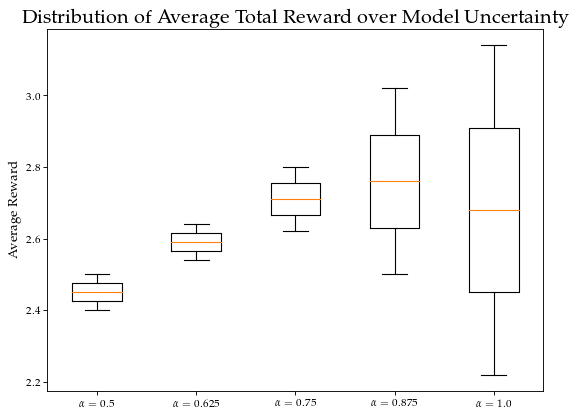

In [326]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
labels = [r"$\alpha="+str(a)+r"$" for a in alpha_vals]
plt.boxplot(np.mean(rewards[:,:,:], axis=2).T, labels=labels)
plt.title("Distribution of Average Total Reward over Model Uncertainty", fontsize=18)
plt.ylabel("Average Reward", fontsize=12)
#plt.xlabel("Avg Total Cost under Model", fontsize=16)
plt.legend(fontsize=16)
#plt.savefig('performance_gridworld_spreads_5.pdf')
plt.show()

# Convergence plots

In [321]:
belief_curves = []
br_belief_curves = []
avg_belief_curves = []
agent_value_curves = []
adv_value_curves = []
Q_val_curves = []
final_q_vals = []
final_n_vals = []
for i, alpha in enumerate(alpha_vals):
    agent = RiskAverseMCTS(mdps, belief, max_depth=4, 
                               alpha=alpha, max_r=2., n_iter=200, K=50, n_burn_in=0  )
    s0 = mdps[0].reset()
    agent.MCTS(s0)
    belief_curves.append(deepcopy(agent.adv_dists))
    br_belief_curves.append(deepcopy(agent.adv_brs))
    avg_belief_curves.append(deepcopy(agent.adv_avg))
    agent_value_curves.append(deepcopy(agent.agent_est_value))
    adv_value_curves.append(deepcopy(agent.adv_est_value))
    Q_val_curves.append(deepcopy(agent.agent_Q_vals))
    final_q_vals.append( [agent.Qha[(s0,a)] for a in mdps[0].action_space(s0)] )
    final_n_vals.append( [agent.Wha[(s0,a)] for a in mdps[0].action_space(s0)] )

In [281]:
(np.array(final_q_vals)).T

array([[ 2.46442116,  2.47250165,  2.48393776,  2.50532014,  2.46070971],
       [ 2.45674298,  2.36898084,  2.33936272,  2.41722517,  2.52346774],
       [ 2.45901139,  2.40198146,  2.35591462,  2.1959323 ,  2.20027907],
       [ 1.97670761,  2.01977627,  1.97019434,  2.0784379 ,  2.12171533]])

In [283]:
np.round( np.array(final_n_vals) ).T

array([[  7873.,  10735.,  12848.,  13350.,   7806.],
       [  7469.,   5369.,   4753.,   6801.,  12400.],
       [  7574.,   6563.,   5212.,   2305.,   2150.],
       [  1084.,   1333.,   1187.,   1544.,   1644.]])

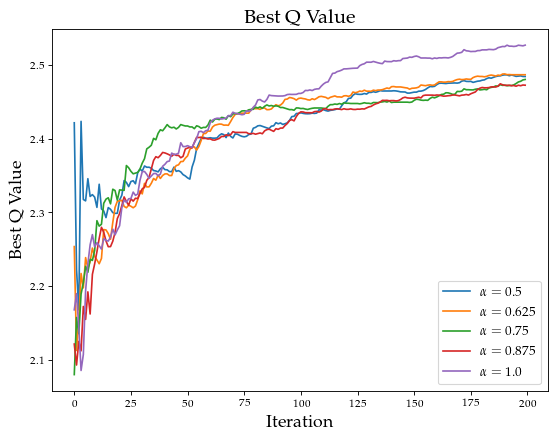

In [327]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
true_vals = [0.8,0.767,0.711,0.625,0.556,0.500]
for i,a in enumerate(alpha_vals):
    plt.plot(np.array(agent_value_curves)[i], label=(r"$\alpha="+str(a)+r"$"))
#     plt.holdon
#     plt.plot([0,n_iter],[true_vals[i], true_vals[i]], linestyle='--')
plt.title("Best Q Value", fontsize=18)
plt.ylabel("Best Q Value", fontsize=16)
plt.xlabel("Iteration", fontsize=16)
plt.legend(fontsize=12)
plt.show()

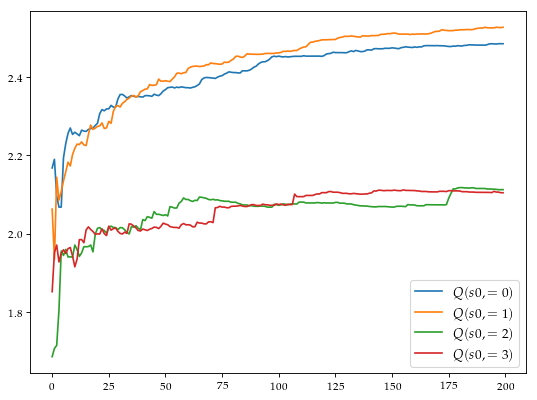

In [334]:
alpha_i = 4
np_Q_vals = np.array(Q_val_curves)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for i in mdps[0].action_space(0):
    plt.plot(np_Q_vals[alpha_i,:,i], label=(r"$Q(s0,="+str(i)+r")$"))
plt.legend(fontsize=12)
plt.show()

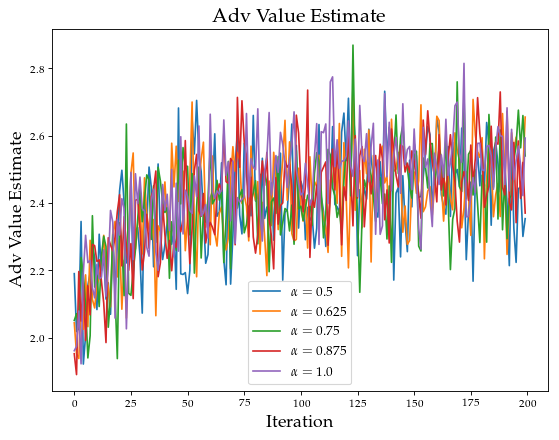

In [328]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for i,a in enumerate(alpha_vals):
    plt.plot(np.array(adv_value_curves)[i], label=(r"$\alpha="+str(a)+r"$"))
plt.title("Adv Value Estimate", fontsize=18)
plt.ylabel("Adv Value Estimate", fontsize=16)
plt.xlabel("Iteration", fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [217]:
belief_curves = np.array(belief_curves)

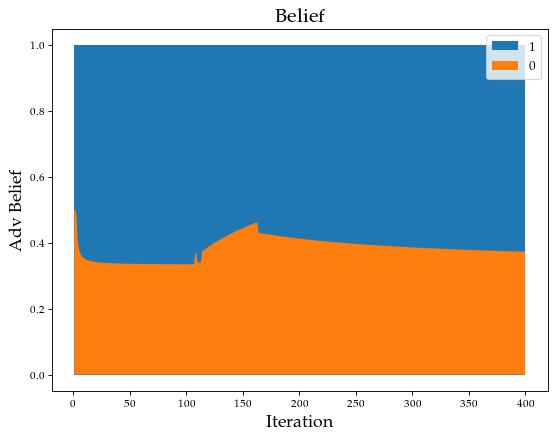

In [262]:
cum_belief_curves = np.cumsum(belief_curves, axis=2)
iterations = np.concatenate([[1],np.arange(cum_belief_curves.shape[1])+1,[cum_belief_curves.shape[1]]])
cum_belief_curves = np.concatenate([np.zeros([cum_belief_curves.shape[0],1,cum_belief_curves.shape[2]]),cum_belief_curves,np.zeros([cum_belief_curves.shape[0],1,cum_belief_curves.shape[2]])], axis=1)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for i in reversed(range(N_params)):
    plt.fill(iterations,cum_belief_curves[2,:,i], label=str(i))
plt.title("Belief", fontsize=18)
plt.ylabel("Adv Belief", fontsize=16)
plt.xlabel("Iteration", fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [184]:
agent.N_belief_updates

201

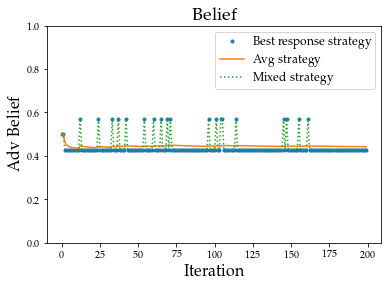

In [338]:
alpha_i = 3
belief_np = np.array(belief_curves)
br_belief_np = np.array(br_belief_curves)
avg_belief_np = np.array(avg_belief_curves)
plt.plot(br_belief_np[alpha_i,:,0], label='Best response strategy', linestyle='None', marker='.')
plt.plot(avg_belief_np[alpha_i,:,0], label='Avg strategy')
plt.plot(belief_np[alpha_i,:,0], label='Mixed strategy', linestyle=':')

plt.title("Belief", fontsize=18)
plt.ylabel("Adv Belief", fontsize=16)
plt.xlabel("Iteration", fontsize=16)
plt.legend(fontsize=12)
plt.ylim([0,1])
plt.show()